## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats
%matplotlib inline

# for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine import discretisers as dsc
from feature_engine import outlier_removers as outr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# for the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# for scoring
from sklearn.dummy import DummyClassifier
from sklearn.metrics import fbeta_score, make_scorer

# ensembling Algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from  sklearn.ensemble import GradientBoostingClassifier

In [2]:
# for unbalanced dataset
from sklearn.model_selection import RepeatedStratifiedKFold

# for oversampling to ensure balanced datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import VotingClassifier

## Loading Dataset

In [3]:
data = pd.read_csv('train.csv')  
test= pd.read_csv("test.csv")

In [4]:
data.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,138662,-0.711273,1.272483,1.681631,0.039897,-0.312381,-1.161083,0.853875,-0.173979,-0.438558,...,-0.208181,-0.414631,0.057957,0.930321,-0.165598,0.038799,0.384295,0.192762,21.87,0
1,235999,1.990679,-0.128465,-1.700556,0.529839,0.136889,-1.404270,0.593353,-0.456700,0.648260,...,0.018179,0.179084,-0.004248,0.039531,0.333765,-0.225201,-0.047285,-0.059682,49.99,0
2,245376,1.812653,-0.476162,-0.338988,1.386750,-0.745965,-0.449870,-0.492226,0.029904,1.129394,...,0.252668,0.655719,0.090057,-0.136884,-0.172452,-0.556921,0.036490,-0.021575,79.00,0
3,202483,-1.014219,0.522775,-0.337978,-1.957797,3.578395,3.266965,0.602857,0.644645,-0.305879,...,0.147742,0.590740,-0.680551,0.745346,1.119496,0.013520,0.004530,-0.132643,6.00,0
4,9710,-0.967270,-0.053815,2.273463,-0.894434,0.728924,0.153524,-0.038330,0.165252,1.172526,...,0.106692,0.514430,-0.081546,-0.305042,-0.354883,0.896254,-0.182293,-0.142810,15.95,0


In [5]:
test.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,83172,-2.033519,-1.079309,1.972553,-1.377534,-0.773444,0.702919,-0.870868,1.082417,-0.789931,...,0.536853,0.300559,0.409305,0.119931,-0.295053,0.331692,-0.277494,0.184017,-0.076897,141.01
1,140094,1.125524,0.189854,1.508660,2.719937,-0.882342,0.128390,-0.622651,0.219444,0.255370,...,-0.225172,-0.097584,-0.172683,0.057556,0.360859,0.265443,-0.040417,0.036686,0.033685,0.00
2,116283,-0.578027,1.109673,1.231751,0.725871,0.139675,-0.030415,0.770472,0.072078,-0.793572,...,0.097561,0.214610,0.773072,-0.110802,0.248029,-0.326140,-0.330373,0.321788,0.198050,43.25
3,222830,1.914017,0.588986,-1.481645,3.515009,1.271977,0.502868,0.536994,-0.055564,-1.452582,...,-0.179258,0.010252,0.020996,0.026001,0.186830,0.288364,-0.004518,-0.073108,-0.063333,30.67
4,60185,1.267642,0.725939,-0.091806,2.370915,0.420349,-0.570252,0.534720,-0.235391,-0.977075,...,-0.172138,-0.052174,-0.176550,-0.161225,-0.123870,0.787280,0.100856,-0.041856,0.004038,1.21


In [6]:
data.shape

(24846, 31)

In [7]:
test.shape

(24846, 30)

<b> <font color='purple'> ** The dataset contains 24846 rows and 31 columns. There are 30 predictor variables and 1 target variable . The test set has only 30 columns as it does not contain the target variable<br>
    
  The target variable is binary in nature and has 0s and 1s<b> </font>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
Id        24846 non-null int64
V1        22459 non-null float64
V2        24846 non-null float64
V3        24846 non-null float64
V4        24846 non-null float64
V5        24846 non-null float64
V6        24846 non-null float64
V7        24846 non-null float64
V8        24846 non-null float64
V9        24846 non-null float64
V10       24846 non-null float64
V11       24846 non-null float64
V12       24846 non-null float64
V13       24846 non-null float64
V14       24846 non-null float64
V15       24846 non-null float64
V16       24846 non-null float64
V17       24846 non-null float64
V18       24846 non-null float64
V19       24846 non-null float64
V20       22317 non-null float64
V21       24846 non-null float64
V22       24846 non-null float64
V23       24846 non-null float64
V24       24846 non-null float64
V25       24846 non-null float64
V26       24846 non-null float64
V2

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 30 columns):
Id     24846 non-null int64
V1     22347 non-null float64
V2     24846 non-null float64
V3     24846 non-null float64
V4     24846 non-null float64
V5     24846 non-null float64
V6     24846 non-null float64
V7     24846 non-null float64
V8     24846 non-null float64
V9     24846 non-null float64
V10    24846 non-null float64
V11    24846 non-null float64
V12    24846 non-null float64
V13    24846 non-null float64
V14    24846 non-null float64
V15    24846 non-null float64
V16    24846 non-null float64
V17    24846 non-null float64
V18    24846 non-null float64
V19    24846 non-null float64
V20    22342 non-null float64
V21    24846 non-null float64
V22    24846 non-null float64
V23    24846 non-null float64
V24    24846 non-null float64
V25    24846 non-null float64
V26    24846 non-null float64
V27    24846 non-null float64
V28    24846 non-null float64
V29    24846 non-null f

<b> <font color='purple'> ** The dataset has columns with datatypes float and int. Hence there are no categorical variables

In [10]:
#Checking for null values in dataset
data.isnull().sum()

Id           0
V1        2387
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20       2529
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
V29          0
Target       0
dtype: int64

In [11]:
Missing = 100*(data.isnull().sum().sum()/ len(data))
print(f'Missing values Percentage: {Missing} %')

Missing values Percentage: 19.785881027127104 %


<b> <font color='purple'> ** The dataset has 19% Null values and they are present in columns V1 and V20. Hence missing value imputation needs to be done.

In [12]:
# Getting Column names
[data.columns]

[Index(['Id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
        'Target'],
       dtype='object')]

In [13]:
discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20]

continuous = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete]
    
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')

There are 30 continuous variables
There are 1 discrete variables


In [14]:
# Summary table of dataset
data.describe()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,24846.000000,22459.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,...,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000
mean,141868.788095,-0.042032,0.019074,-0.055260,0.029289,-0.031085,-0.008175,-0.026007,0.014152,-0.017939,...,0.004708,0.006116,-0.004320,-0.005632,0.003193,0.001730,0.003160,-0.000100,91.698618,0.009820
std,82016.035976,2.061469,1.722647,1.730072,1.482053,1.616062,1.413044,1.620777,1.236557,1.140772,...,0.753043,0.728869,0.622440,0.602507,0.518214,0.483415,0.455299,0.314326,310.349300,0.098613
min,32.000000,-37.054295,-39.818310,-48.325589,-5.231828,-113.743307,-19.996349,-37.060311,-39.688571,-11.126624,...,-21.620120,-8.887017,-23.222016,-2.759942,-4.930750,-1.658162,-7.976100,-15.430084,0.000000,0.000000
25%,70705.000000,-0.941997,-0.611444,-0.918977,-0.853705,-0.705745,-0.778707,-0.565469,-0.207270,-0.659425,...,-0.225318,-0.528751,-0.163086,-0.363609,-0.310198,-0.325839,-0.069698,-0.053829,5.470000,0.000000
50%,141887.000000,0.002750,0.068992,0.163070,-0.006193,-0.070299,-0.279575,0.032157,0.026507,-0.056063,...,-0.026834,0.016988,-0.011396,0.036837,0.020346,-0.049872,0.001493,0.010855,21.990000,0.000000
75%,212513.500000,1.309469,0.825253,1.016704,0.759149,0.598372,0.402585,0.569205,0.335042,0.586035,...,0.192690,0.533115,0.147343,0.433292,0.352613,0.241366,0.093725,0.079364,77.900000,0.000000
max,284781.000000,2.418267,19.167239,3.862590,15.304184,28.762671,73.301626,120.589494,19.587773,8.918202,...,27.202839,8.272233,17.606637,4.584549,4.554683,3.415636,31.612198,15.522649,25691.160000,1.000000


<font color='purple'>  <b>  ** Summary table:<br>
    
    We see that predictors like "V1" have values between -37 and 2, whereas predictors like "V29" have values between 0 to 25691.16 which indicates the need of scaling

## Target Variable- Analysis

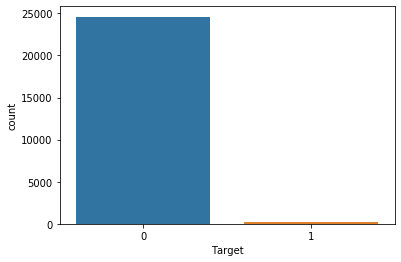

In [15]:
sns.countplot('Target', data=data)

In [16]:
data.Target.value_counts()

0    24602
1      244
Name: Target, dtype: int64

In [17]:
freq_Target = 100*(data['Target'].value_counts() / len(data))
print(freq_Target.map('{:,.3f} %'.format))

0    99.018 %
1     0.982 %
Name: Target, dtype: object


<font color='purple'>  <b>  ** Imbalanced Dataset:<br>
   
    This indicates that the dataset is IMBALANCED with the minority class 0.98% and the majority class at 99.018%.<br>
    Instructions for this dataset indicates that the positive class/minority class is our class of interest.

In [18]:
# correlation Matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
Id,1,0.113209,-0.018078,-0.3444,-0.118087,0.146777,-0.0552686,0.07293,-0.0457625,0.0119501,0.0331763,-0.229043,0.114747,-0.0571264,-0.0504673,-0.174524,0.0162797,-0.0255855,0.0933752,0.0219458,-0.0434106,0.0343265,0.134566,0.0510618,-0.0129957,-0.215736,-0.0402774,-0.00983047,-0.0138698,-0.00651187,-0.0284461
V1,0.113209,1,-0.0567485,0.153798,-0.0812925,0.138548,-0.0236522,0.0444142,-0.003346,0.048714,0.11648,-0.0825218,0.130091,-0.00107112,0.121744,0.00434658,0.0945623,0.170529,0.0852644,-0.00317469,0.0104085,0.0105298,0.00387892,0.062343,-0.00482889,0.0108753,-0.000272358,-0.0299056,0.0277657,-0.262588,-0.195578
V2,-0.018078,-0.0567485,1,-0.0718948,0.0618459,0.0148916,-0.0826901,-0.174932,0.0398756,-0.0397969,-0.0853639,0.0803974,-0.110969,0.00968137,-0.122548,-0.00242517,-0.116232,-0.135606,-0.0780102,0.0318339,0.0658608,-0.00147639,0.0176685,0.0939861,-0.00284032,0.0238205,0.000962234,-0.0377527,0.0261255,-0.528025,0.185381
V3,-0.3444,0.153798,-0.0718948,1,-0.131803,0.197305,-0.0190943,0.0934941,-0.00943856,0.0998432,0.207477,-0.151531,0.236723,-0.0100863,0.224101,-2.56098e-05,0.170135,0.267758,0.129076,-0.0370814,0.0291422,0.0166693,-0.0154754,0.0159887,-0.0042182,-0.00276024,-0.00818432,-0.0829671,0.0464682,-0.257823,-0.358543
V4,-0.118087,-0.0812925,0.0618459,-0.131803,1,-0.0937734,-0.0124741,-0.0736591,0.00760484,-0.0778984,-0.148313,0.11496,-0.176475,-0.00399629,-0.172559,-0.00674795,-0.118404,-0.182099,-0.0847185,0.0236646,-0.0179426,0.00650978,0.00554803,-0.0362047,-0.00400374,-0.00528294,0.00807665,0.0273654,0.00751389,0.121432,0.295945
V5,0.146777,0.138548,0.0148916,0.197305,-0.0937734,1,-0.119833,-0.106402,0.0257433,0.0610031,0.148578,-0.085907,0.140703,-0.0228076,0.118452,-0.0148864,0.0639442,0.17805,0.0892071,-0.0473609,0.148534,0.0809971,-0.0259727,-0.0439496,-0.0158819,-0.0370243,-0.0264327,-0.168281,0.11212,-0.50648,-0.156473
V6,-0.0552686,-0.0236522,-0.0826901,-0.0190943,-0.0124741,-0.119833,1,0.185972,-0.0567372,0.00690631,0.0359747,-0.0249258,0.0389754,0.0135423,0.0516698,0.0300274,0.0709584,0.0432882,0.0166892,0.0188257,-0.140155,-0.0578154,0.0104037,0.0307212,0.0211337,0.0185623,0.00959983,0.107747,-0.10077,0.332966,-0.0982899
V7,0.07293,0.0444142,-0.174932,0.0934941,-0.0736591,-0.106402,0.185972,1,-0.083091,0.0858588,0.164472,-0.113027,0.188624,0.0230326,0.181246,0.0419466,0.240479,0.246044,0.130057,-0.0209973,-0.196942,-0.0787561,0.0151445,0.0261827,0.0199303,0.0375615,0.0139783,0.183282,-0.137196,0.509496,-0.297257
V8,-0.0457625,-0.003346,0.0398756,-0.00943856,0.00760484,0.0257433,-0.0567372,-0.083091,1,-0.0145866,-0.0207486,0.0145594,-0.0156973,0.00248997,-0.0172607,-0.00756259,-0.0339541,-0.0296692,-0.0148207,0.00538824,0.0683649,-0.0108133,-0.00369928,-0.0079089,0.000388214,0.0116322,0.002853,-0.00018937,0.0541522,-0.149102,0.0331731
V9,0.0119501,0.048714,-0.0397969,0.0998432,-0.0778984,0.0610031,0.00690631,0.0858588,-0.0145866,1,0.138851,-0.0773988,0.134771,-0.000344898,0.125378,0.0127968,0.109177,0.162793,0.0777821,-0.0283891,-0.00417901,0.00199658,-0.00171,-0.0173228,0.00691048,-0.00493316,-0.0123157,-0.0157591,-0.014227,-0.0498143,-0.209813


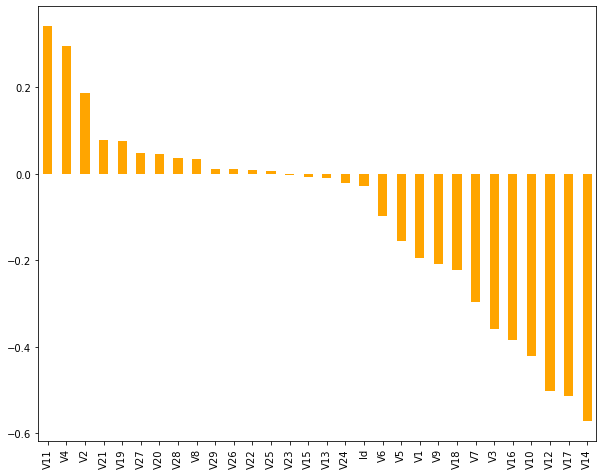

In [19]:
data.corr()['Target'].sort_values(ascending=False).iloc[1:].plot(kind='bar', figsize=(10, 8), color='orange')

<font color='purple'>  <b>  ** Correlation matrix indicates the following:<br>
    High positively correlated predictors with "TARGET"<br>
    1. V11
    2. V4
    3. V2
    
 <font color='purple'>  <b>
    High negatively correlated predictors with "TARGET"
    1. V14
    2. V17
    3. V12
    
    Apart from these:
    1. V7 has high positive correlation with V29
    2. V12 has high positive correlation with V17
    3. V2 has high negative correlation with V29
    4. V5 has high negative correlation with V29 and so on

In [20]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [21]:
np.warnings.filterwarnings('ignore')

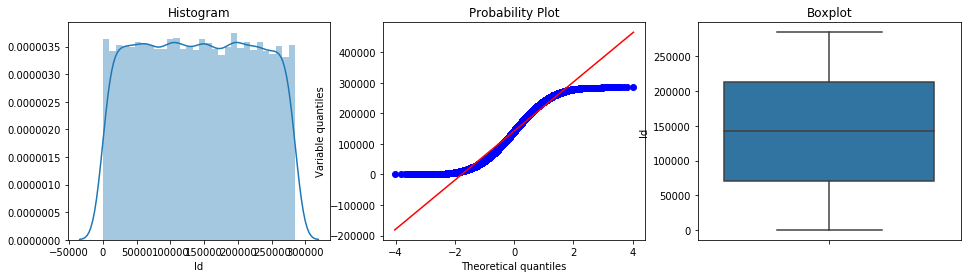

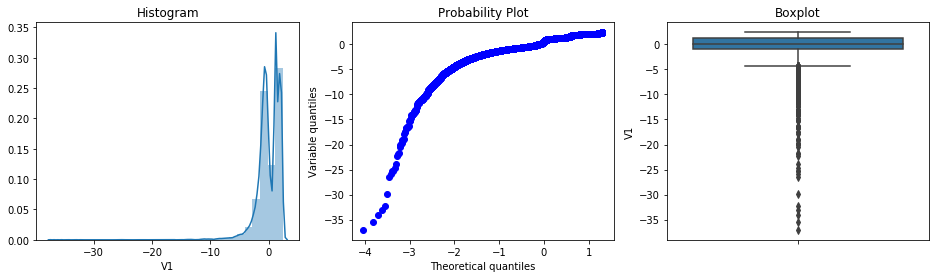

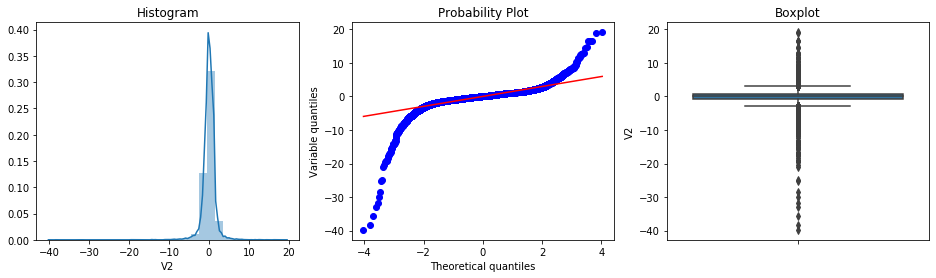

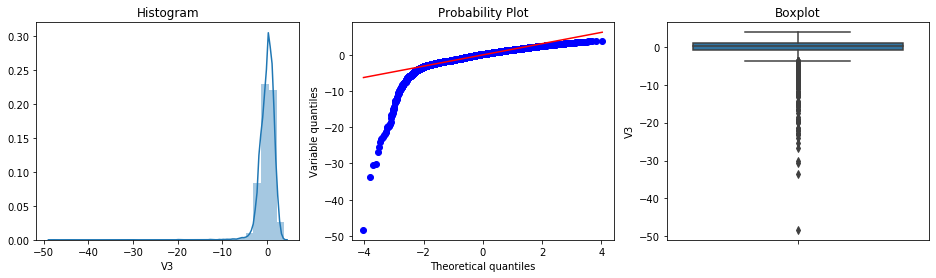

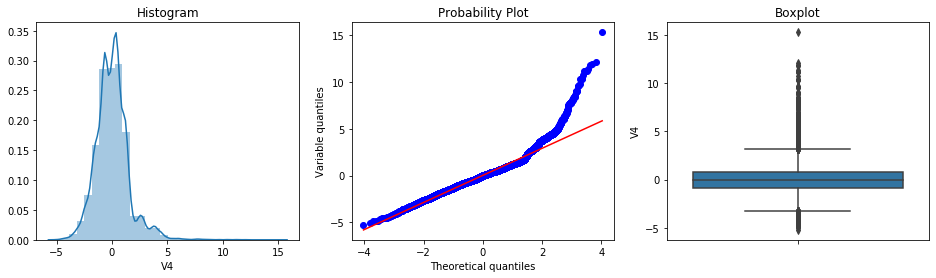

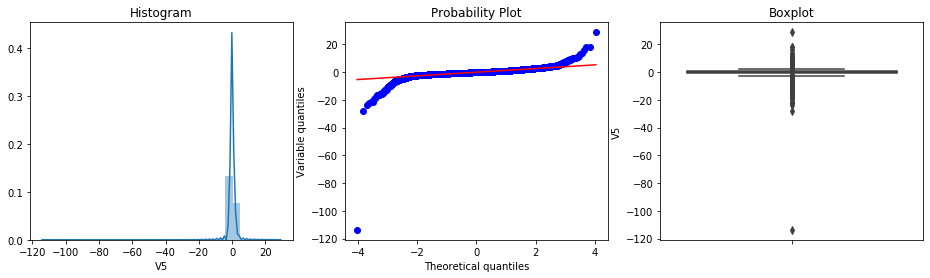

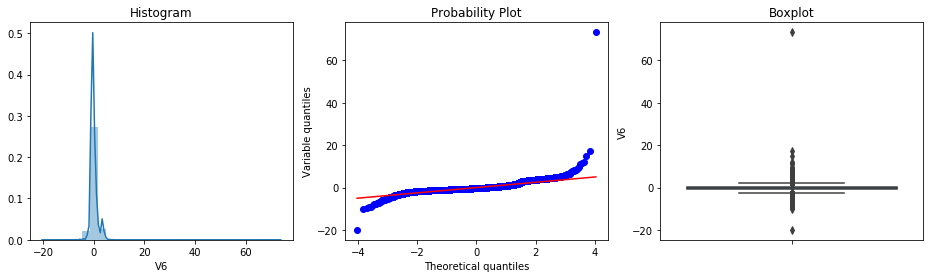

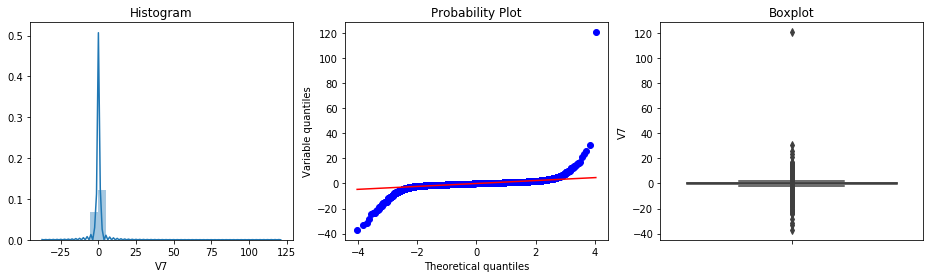

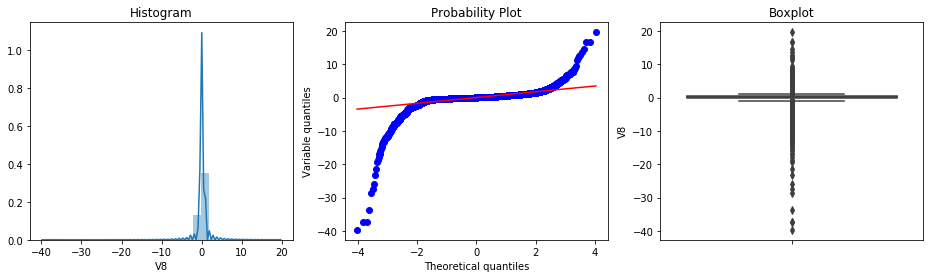

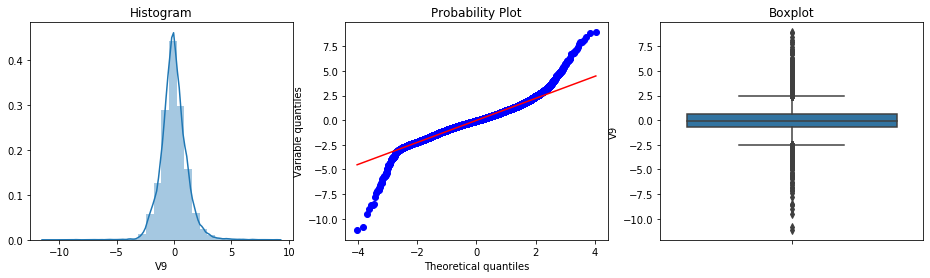

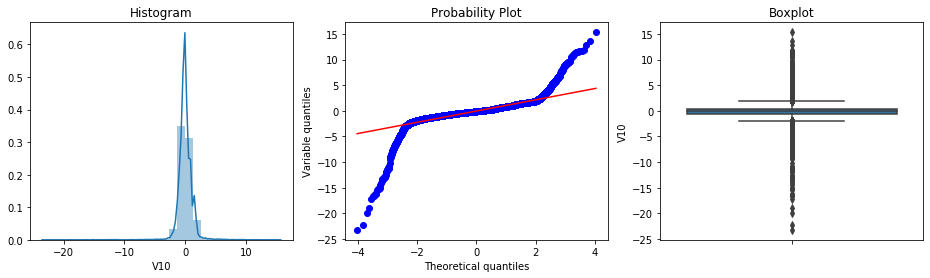

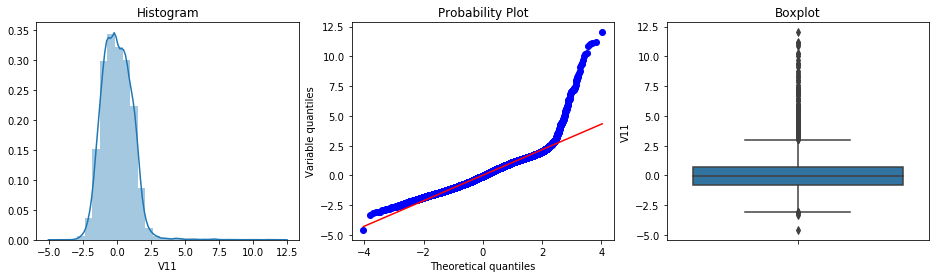

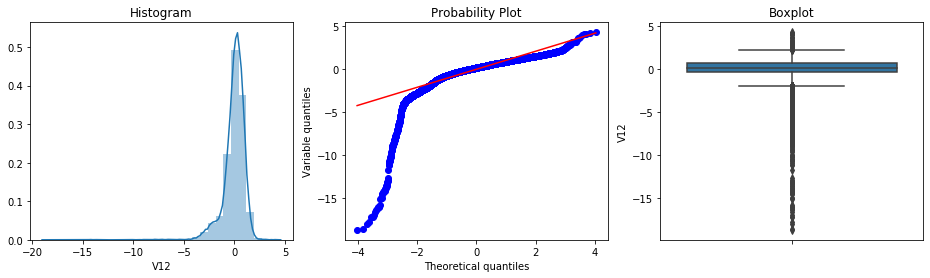

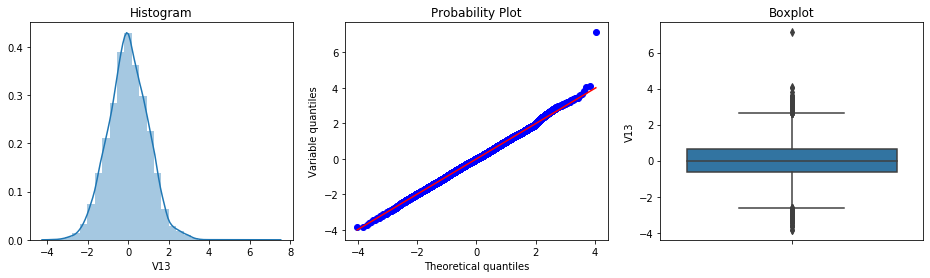

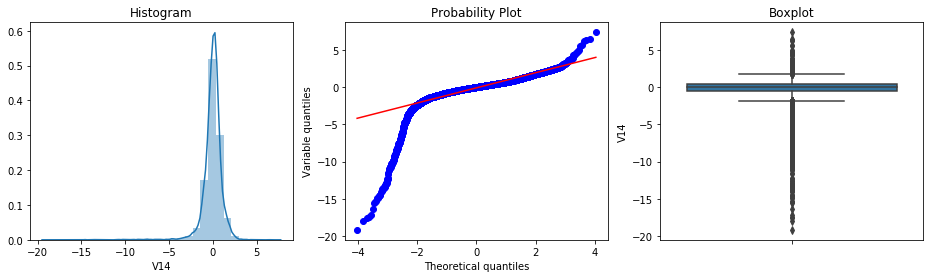

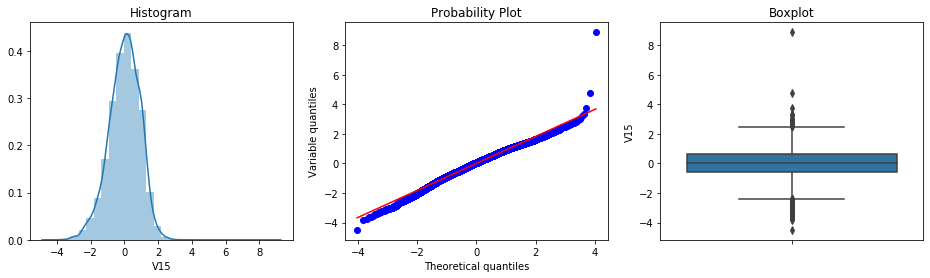

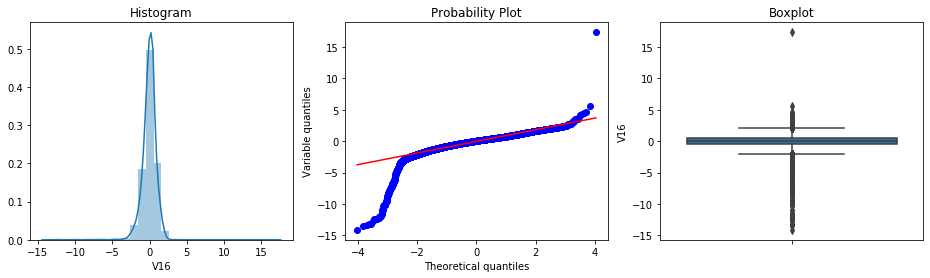

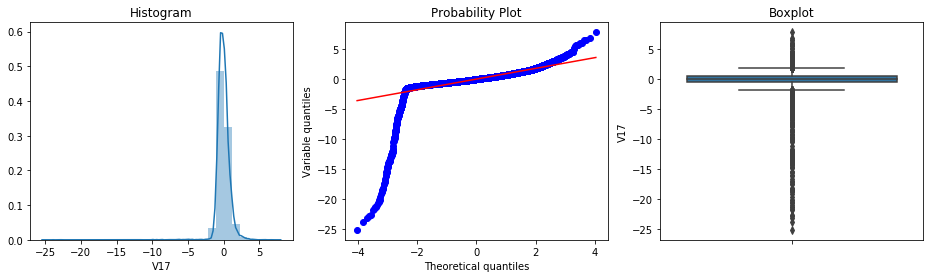

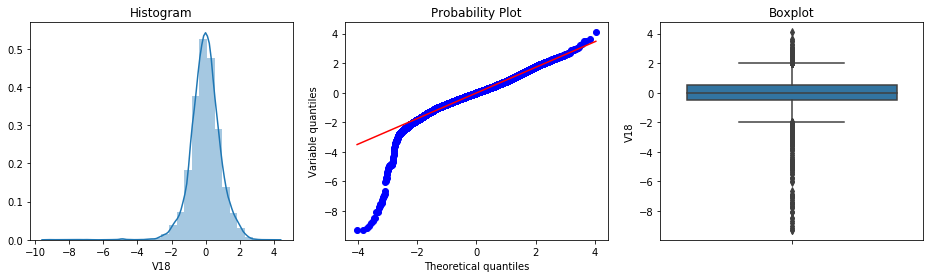

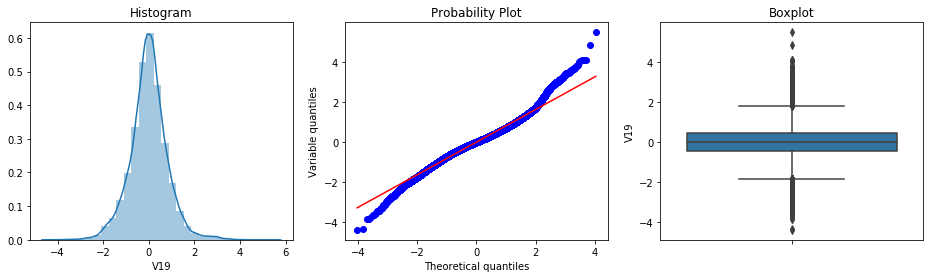

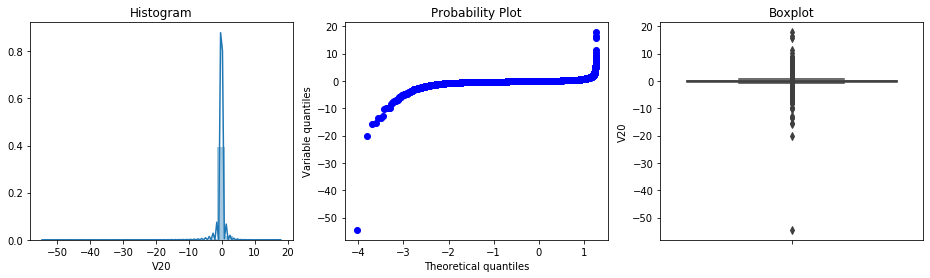

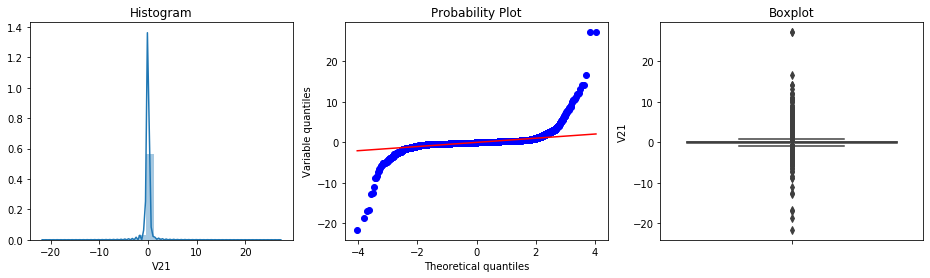

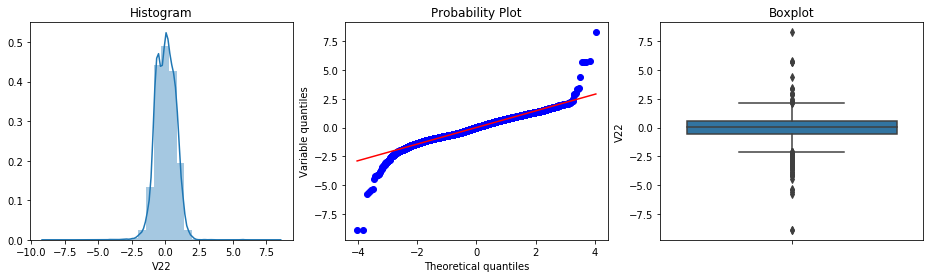

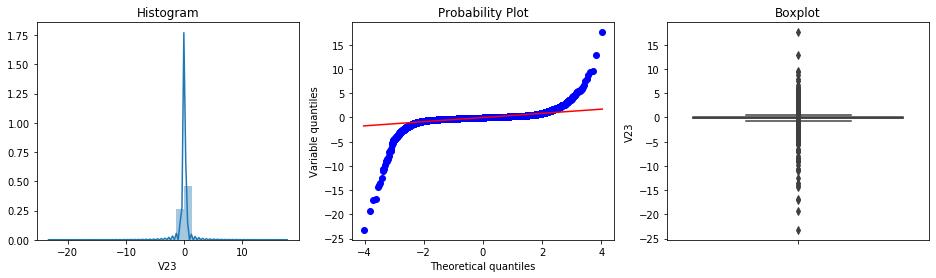

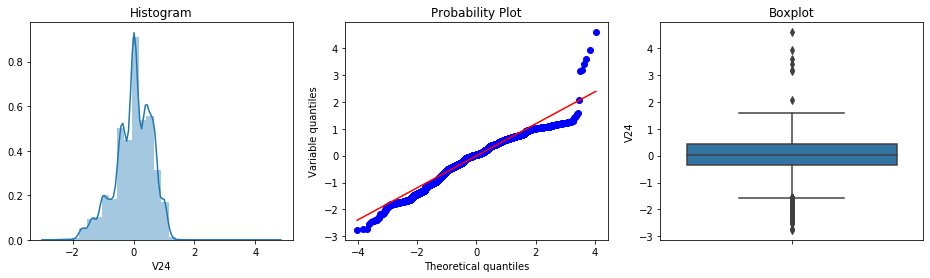

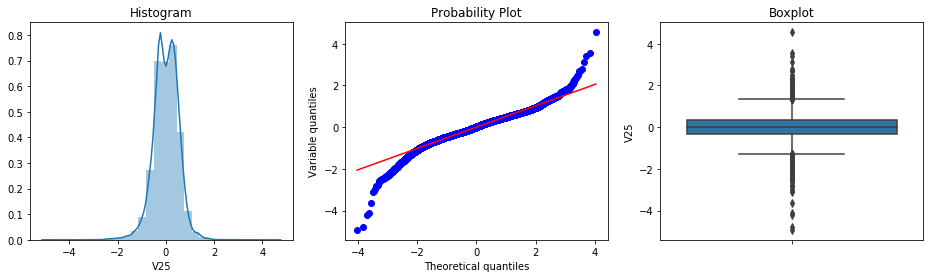

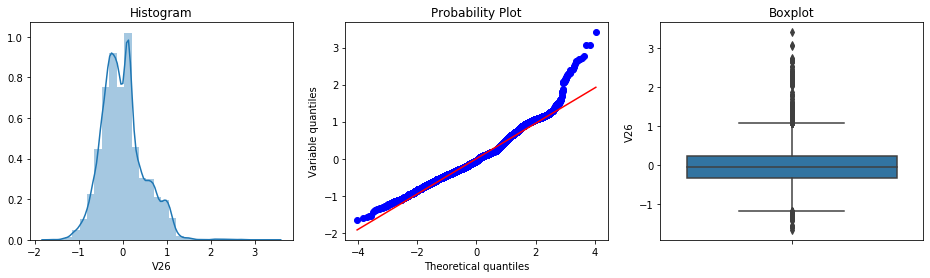

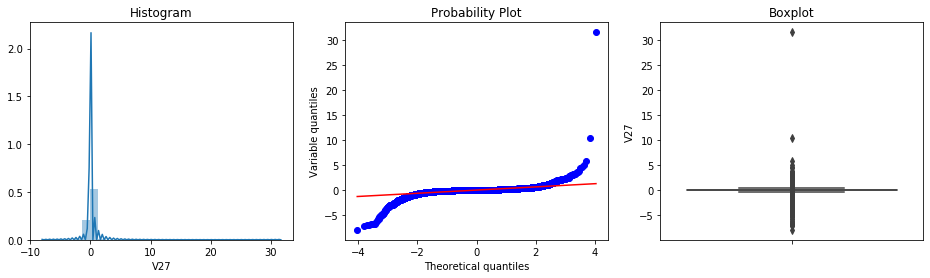

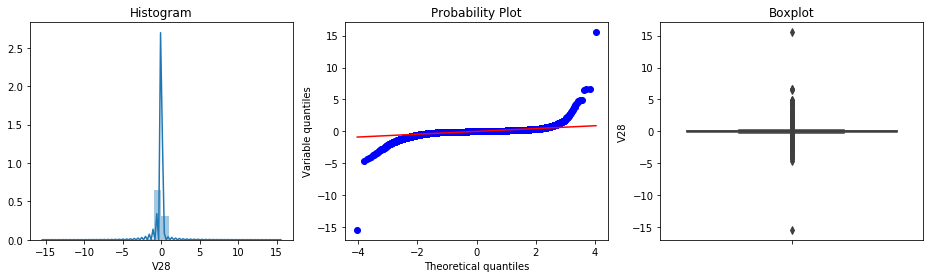

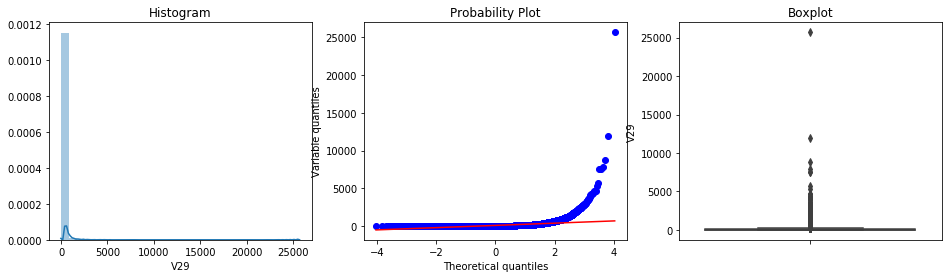

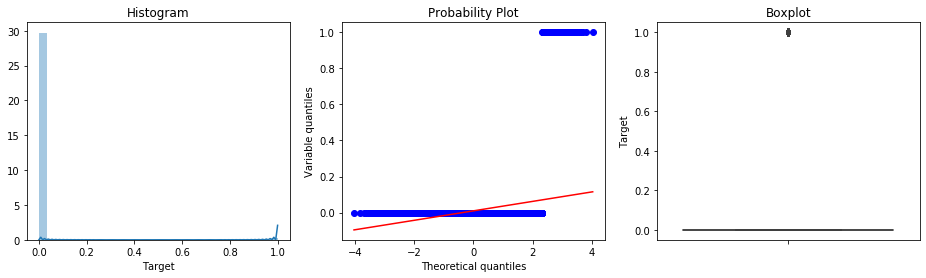

In [22]:
for variable in data:
    diagnostic_plots(data, variable)

<font color='purple'>  <b> **  Histogram and QQ Plots indicate that:
    
    
    1. Majority of the predictors are not normal in distribution 
    2. Most predictors are skewed(Ex: V1) and have outliers(Ex: V13, V15)
    
    Hence variable transformation and outlier handling should be done in the preprocessing stage

In [23]:
def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)


    return upper_boundary, lower_boundary

In [24]:
outliers_dict={}
for var in continuous:
    upper_boundary, lower_boundary = find_boundaries(data, var,1.5)
    outliers = np.where(data[var] > upper_boundary, True,
                    np.where(data[var] < lower_boundary, True, False))
    outliers_dict[var]=data.loc[outliers, var] 

In [25]:
for key, value in outliers_dict.items():
    print(key, outliers_dict[key].count(),outliers_dict[key].min(),outliers_dict[key].max())

Id 0 nan nan
V1 591 -37.05429492 -4.325002602
V2 1213 -39.81831012 19.16723901
V3 405 -48.32558936 -3.822742266
V4 1034 -5.231827865 15.30418399
V5 1195 -113.7433067 28.76267129
V6 2027 -19.99634854 73.30162555
V7 881 -37.06031146 120.5894939
V8 2107 -39.68857108 19.58777262
V9 814 -11.12662352 8.918202354
V10 1016 -23.22825484 15.33174156
V11 182 -4.568390246 12.01891318
V12 1399 -18.68371463 4.242791466
V13 277 -3.844973612 7.126882959
V14 1381 -19.21432549 7.439565532
V15 250 -4.498944677 8.877741598
V16 837 -14.12985452 17.31511152
V17 792 -25.16279937 7.733456284
V18 693 -9.287832214 4.093439956
V19 955 -4.395282985 5.501747214
V20 2198 -54.49772049 17.81950743
V21 1316 -21.62011965 27.20283916
V22 115 -8.887017141 8.272232984
V23 1666 -23.22201631 17.60663686
V24 380 -2.759942203 4.584549137
V25 482 -4.93074976 4.554682756
V26 504 -1.658161935 3.415636243
V27 3484 -7.976099818 31.61219811
V28 2672 -15.43008391 15.52264869
V29 2801 187.0 25691.16


<font color='purple'>  <b> **  Outliers:
    1. Variables that have very high % of outliers are V2,V4,V5,V6,V8,V10,V12,V14,V20,V21,V23,V27,V28,V29

In [26]:
# Checking for skewness
from scipy.stats import skew 
skewness = data.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

V29       31.080349
V7        14.243676
V27       11.526541
Target     9.941720
V6         6.670317
V21        4.292350
V11        1.136203
V4         1.001692
V28        0.870049
V26        0.592041
V9         0.260322
V19        0.171941
V13        0.049559
Id         0.006133
V22       -0.238624
V15       -0.309709
V25       -0.417296
V24       -0.547517
V18       -1.008336
V10       -1.434763
V16       -2.660257
V2        -3.556259
V3        -4.334610
V12       -4.429599
V14       -4.435162
V23       -6.184958
V17       -7.868474
V8        -8.230140
V5       -15.002610
V1              NaN
V20             NaN
dtype: float64

<font color='purple'>  <b> ** skewness:

Variables that have skewness greater than 5 should be transformed. Variables that are positively skewed are V29, V7, V27 and V6. Negatively skewed variables are V23, V17, V8, V5.

In [27]:
data = data.drop(['Id'], axis=1)

# Dataset Splitting

In [28]:
X_train, X_val, y_train, y_val = train_test_split(
    data.drop('Target', axis=1), data['Target'], test_size=0.3, random_state=0)

X_train.shape, X_val.shape

((17392, 29), (7454, 29))

<font color='purple'> <b> ** Dataset Splitting: <br>
    Dataset is split into Train and Validation to avoid the name confusion with the actual test data that is provided for prediction

# Data Preprocessing

In [29]:
data_preprocess = Pipeline([
    
     # missing data imputation 
    ('missing_ind', mdi.AddNaNBinaryImputer(
        variables= ['V1', 'V20'])),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                        variables=['V20'])),
    ('imputer_num1', mdi.MeanMedianImputer(imputation_method='median',
                                        variables=['V1'])),
   
    
     # removing skewness
    #('Skewness', vt.PowerTransformer(variables = ['V29'], exp=1/3)),
    #('Skewness', vt.YeoJohnsonTransformer(variables = ['V29', 'V7', 'V27','V6'])),
    #('Skewness', vt.ReciprocalTransformer(variables = ['V29', 'V7', 'V27'])),

    #('discretisation1', dsc.EqualWidthDiscretiser(bins=10, variables=['V28', 'V23', 'V1'])),
   # ('categorical_enc1', ce.OneHotCategoricalEncoder(
       # top_categories=2, variables= ['V28', 'V23', 'V1'])),
    
    # removing outliers
    ('capper', outr.Winsorizer(
        distribution='skewed', tail='both', fold=3, variables=['V2','V4','V5','V6','V8','V10',
                                                            'V12','V14','V20','V21','V23','V28','V29','V27'])),
    
    # feature Scaling
    #('scaler', RobustScaler()),
    ('scaler', StandardScaler(with_std = False)),

])

<font color='purple'> <b> ** Preoprocessing steps include: <br>
    
    
    1. Binary imputation for all predictors with null values. This will insert a column with values 1 and 0, 1 for all observation where there are values and 0 when it is null are contains nan values
    
    
    2. Mean imputation is done for null values in cols 'V20' because median imputation for 'V1'. Here median imputation is used as V1 is highly skewed
  
    
    3. Though certain predictors were skewed and transformation was needed, it is not done as it only further lowered the CV score
    
    
    4. Winsorizer is used for outlier handling as most predictors had outliers. Winsorizer caps the outliers, that is the large values are replaced with less extreme values
    
    
    5. Standardscalar is used to standardize values as the algorithms like knn , svc may not perform well without scaling since they use distance calculation. 
    
 

In [30]:
data_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('missing_ind', AddNaNBinaryImputer(variables=['V1', 'V20'])),
                ('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['V20'])),
                ('imputer_num1',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['V1'])),
                ('capper',
                 Winsorizer(distribution='skewed', fold=3, tail='both',
                            variables=['V2', 'V4', 'V5', 'V6', 'V8', 'V10',
                                       'V12', 'V14', 'V20', 'V21', 'V23', 'V28',
                                       'V29', 'V27'])),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=False))],
         verbose=False)

In [31]:
# Apply Transformations
X_train=data_preprocess.transform(X_train)
X_val =data_preprocess.transform(X_val)

# Saving and Uploading models using Joblib

// To Save XG boost<br> 
from joblib import dump, load<br>
dump(xgbc_grid, 'Project 2 - Trial 5.joblib') <br>

// To Save Gradient Boosting<br>
dump(gbc_grid, 'Project 2 - Trial 5a.joblib')<br> 

// To Save extra Trees<br>
dump(etc_grid, 'Project 2 - Trial 5b.joblib') <br>

// To Save random forest<br>
dump(rfc_grid, 'Project 2 - Trial 5c.joblib')<br> 

// To Save SVC Kernel<br>
dump(grid_svc_kernel1, 'Project 2 - Trial 5d.joblib') <br>

<font color='purple'> <b> ** Note: <br>
    
    The above codes were run in one of the previous trial jupyter notebook(Trial 5) and were saved. Now, the below codes are run to retrieve the saved model

In [31]:
# To retrieve XG boost
from joblib import dump, load
xgbc_grid = load('Project 2 - Trial 5.joblib') 

In [32]:
# To retrieve Gradient Boosting
gbc_grid = load('Project 2 - Trial 5a.joblib')

In [33]:
# To retrieve extra Trees
etc_grid = load('Project 2 - Trial 5b.joblib')

In [34]:
# To retrieve random Forest
rfc_grid = load('Project 2 - Trial 5c.joblib')

In [35]:
# To retrieve SVC Kernel
grid_svc_kernel1 = load('Project 2 - Trial 5d.joblib')

# Model training - Basic Algorithms

In [32]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)

### Logistic Regression - Trial 1

In [45]:
logreg=LogisticRegression(max_iter=1000, random_state= 0)

#define a list of parameters
logreg_param= {'C': [0.1,1,1.5,2,3,4,5,8,10],
               'tol':[1e-4,1e-5,1e-3]}


#apply grid search
logreg_grid = GridSearchCV(logreg, logreg_param,cv=6, return_train_score=True, scoring= ftwo_scorer)
logreg_grid.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean Cross-validation score: {:.2f}".format(logreg_grid.best_score_))

#find best parameters
print(f'Logreg parameters: {logreg_grid.best_params_}')

# Check test data set performance
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_val,y_val)}')

Best Mean Cross-validation score: 0.84
Logreg parameters: {'C': 1, 'tol': 0.0001}
Train score is 0.8482676224611709
Test score is 0.8213256484149856


### Logistic Regression - Trial 2

In [46]:
logreg1 =LogisticRegression(max_iter=1000, random_state= 0)

#define a list of parameters
logreg_param1 = {'C': [0.1,1,1.5,2,3,4,5,8,10],
               'tol':[1e-4,1e-5,1e-3],
               'solver':['lbfgs', 'liblinear', 'sag','saga'],
               'penalty':['l1', 'l2']
              }

ftwo_scorer = make_scorer(fbeta_score, beta=2)

#apply grid search
logreg_grid1 = GridSearchCV(logreg1, logreg_param1 ,cv=6, return_train_score=True, scoring= ftwo_scorer)
logreg_grid1.fit(X_train,y_train)

# Mean Cross validation Score
print("Best Mean Cross-validation score: {:.2f}".format(logreg_grid1.best_score_))

#find best parameters
print(f'Logreg parameters: {logreg_grid1.best_params_}')

# Check test data set performance
print(f'Train score is {logreg_grid1.score(X_train,y_train)}')
print(f'Test score is {logreg_grid1.score(X_val,y_val)}')

Best Mean Cross-validation score: 0.84
Logreg parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Train score is 0.8492822966507179
Test score is 0.8213256484149856


### Decision Tree Trial 1

In [67]:
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(3,36),
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random']}
               
#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=6, return_train_score = True, scoring=ftwo_scorer)
grid_dtree.fit(X_train, y_train)
 
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree.score(X_val,y_val))

Best Mean Cross-validation score: 0.85

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
Decision Tree Performance Train:  0.8661887694145759
Decision Tree Performance Test:  0.7971014492753623


In [80]:
## To Save basic algorithm - decision tree
from joblib import dump, load
dump(grid_dtree, 'dtree basic.joblib') 

['dtree basic.joblib']

### Decision Tree Trial 2

In [86]:
dtree1 = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree1 = {'max_depth': range(3,36),
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_features': ['auto', 'sqrt', 'log2']
              }
               
#apply grid search
grid_dtree1 = GridSearchCV(dtree1, param_dtree1, cv=6, return_train_score = True, scoring=ftwo_scorer)
grid_dtree1.fit(X_train, y_train)
 
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree1.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree1.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree1.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree1.score(X_val,y_val))

Best Mean Cross-validation score: 0.83

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'splitter': 'random'}
Decision Tree Performance Train:  0.8413461538461537
Decision Tree Performance Test:  0.7971014492753623


### KNN Trial 1

In [49]:
knn = KNeighborsClassifier(metric = 'minkowski')

# define a list of parameters
param_knn = {'n_neighbors': range(2,45),
             'p': [1,2]}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=6, return_train_score=True, scoring=ftwo_scorer)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance: ", grid_knn.score(X_val,y_val))

Best Mean Cross-validation score: 0.80

KNN parameters:  {'n_neighbors': 3, 'p': 1}
KNN Train Performance:  0.8809523809523809
KNN Test Performance:  0.7971014492753623


### KNN Trial 2

In [61]:
knn1 = KNeighborsClassifier()

# define a list of parameters
param_knn1 = {'n_neighbors': range(2,45)}

#apply grid search
grid_knn1 = GridSearchCV(knn1, param_knn1, cv=5, return_train_score=True, scoring=ftwo_scorer)
grid_knn1.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn1.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn1.best_params_)

# Check test data set performance
print("KNN Train Performance: ", grid_knn1.score(X_train,y_train))
print("KNN Test Performance: ", grid_knn1.score(X_val,y_val))

Best Mean Cross-validation score: 0.75

KNN parameters:  {'n_neighbors': 3}
KNN Train Performance:  0.8212560386473429
KNN Test Performance:  0.7478005865102639


### Support Vector Machine

#### SVC Linear Trial 1

In [91]:
svc_linear = SVC(kernel = 'linear')

#define a list of parameters
param_svc_linear = {'C': [0.7, 0.8, 0.9, 1, 1.5, 10],
                   'gamma':[0.00001, 0.0001,0.001,0.1]}

#apply grid search
grid_param_svc_linear = GridSearchCV(svc_linear, param_svc_linear, cv=5, return_train_score = True, scoring=ftwo_scorer)
grid_param_svc_linear.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svc_linear.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svc_linear.best_params_)

# Check test data set performance
print("SVC Performance train: ", grid_param_svc_linear.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svc_linear.score(X_val,y_val))

Best Mean Cross-validation score: 0.83

SVC parameters:  {'C': 0.7, 'gamma': 1e-05}
SVC Performance train:  0.8333333333333333
SVC Performance test:  0.7971014492753623


#### SVC Linear Trial 2

In [62]:
svc_linear1 = SVC(kernel = 'linear')

#define a list of parameters
param_svc_linear1 = {'C': [0.01, 0.1,0.7, 0.8, 0.9, 1],
                   'gamma':[0.00001, 0.0001,0.001]}

#apply grid search
grid_param_svc_linear1 = GridSearchCV(svc_linear1, param_svc_linear1, cv=5, return_train_score = True, scoring=ftwo_scorer)
grid_param_svc_linear1.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svc_linear1.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svc_linear1.best_params_)

# Check test data set performance
print("SVC Performance train: ", grid_param_svc_linear1.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svc_linear1.score(X_val,y_val))

Best Mean Cross-validation score: 0.83

SVC parameters:  {'C': 0.01, 'gamma': 1e-05}
SVC Performance train:  0.8333333333333333
SVC Performance test:  0.7971014492753623


#### SVC Kernel- rbf

In [94]:
svc_kernel = SVC(kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [1,10,20, 30, 100,150],'gamma':[0.0001,0.001,0.005,0.010,0.1,1]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=6, n_jobs=2, scoring= ftwo_scorer)
grid_svc_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel.best_params_)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_val,y_val))

Best Mean Cross-validation score: 0.83
SVC parameters:  {'C': 10, 'gamma': 0.0001}
train score:  0.8333333333333333
test score:  0.7971014492753623


#### SVC Kernel-Sigmoid

In [63]:
svc_kernel_s = SVC(kernel = 'sigmoid')

#define a list of parameters
param_svc_kernel_s = {'C': [10, 20, 50, 100, 1000],'gamma':[0.000001, 0.001,0.1,0.25, 1,10]}

#apply grid search
grid_svc_kernel_s = GridSearchCV(svc_kernel_s, param_svc_kernel_s, cv=6, n_jobs=2, scoring= ftwo_scorer)
grid_svc_kernel_s.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel_s.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel_s.best_params_)

print('train score: ', grid_svc_kernel_s.score(X_train, y_train))
print('test score: ', grid_svc_kernel_s.score(X_val,y_val))

Best Mean Cross-validation score: 0.83
SVC parameters:  {'C': 1000, 'gamma': 1e-06}
train score:  0.8333333333333333
test score:  0.7971014492753623


### Random Forest

In [101]:
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 11, 12, 13, 14, 15, 16],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=6, return_train_score=True,scoring= ftwo_scorer)
rfc_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(rfc_grid.best_score_))
print()

#find best parameters
print('Randomforest parameters: ',rfc_grid.best_params_)


# Check test data set performance
print("Train score of Randomforest: ",rfc_grid.score(X_train,y_train))
print("Test score of Randomforest: ",rfc_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.85

Randomforest parameters:  {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 100}
Train score of Randomforest:  0.933806146572104
Test score of Randomforest:  0.8333333333333333


### Extra Trees

In [102]:
etc= ExtraTreesClassifier(random_state=0)
etc_param = { 
    'n_estimators': [200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [ 12, 13, 14, 15, 16],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=6, return_train_score=True,scoring= ftwo_scorer)
etc_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(etc_grid.best_score_))
print()

#find best parameters
print('Extra-Tree parameters: ',etc_grid.best_params_)


# Check test data set performance
print("Train score of Extra-Tree: ",etc_grid.score(X_train,y_train))
print("Test score of Extra-Tree: ",etc_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.83

Extra-Tree parameters:  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 600}
Train score of Extra-Tree:  0.9671746776084408
Test score of Extra-Tree:  0.8333333333333333


### Gradient Boosting

In [104]:
gbc= GradientBoostingClassifier(random_state=0)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [80,90,100,110,150],
              'learning_rate' : [0.1, 0.2, 0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring= ftwo_scorer)
gbc_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(gbc_grid.best_score_))
print()

#find best parameters
print('Gradient Boost parameters: ',gbc_grid.best_params_)


# Check test data set performance
print("Train score of Gradient Boost: ",gbc_grid.score(X_train,y_train))
print("Test score of Gradient Boost: ",gbc_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.79

Gradient Boost parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}
Train score of Gradient Boost:  0.9906759906759907
Test score of Gradient Boost:  0.7381615598885793


### XgBoost Trial 1

In [105]:
xgbc= XGBClassifier(random_state=0,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6,7,8,9],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.2,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring= ftwo_scorer)
xgbc_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(xgbc_grid.best_score_))
print()

#find best parameters
print('XG Boost parameters: ',xgbc_grid.best_params_)


# Check test data set performance
print("Train score of XG Boost: ",xgbc_grid.score(X_train,y_train))
print("Test score of XG Boost: ",xgbc_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.86

XG Boost parameters:  {'learning_rate': 0.6, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}
Train score of XG Boost:  1.0
Test score of XG Boost:  0.8213256484149856


### XgBoost Trial 2

In [59]:
xgbc1= XGBClassifier(random_state=0,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param1 = {
              'max_depth' : [6,7,8,9],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.2,0.4,0.6,0.8],
               'min_child_weight' : [1,3,5],
                'subsample':[0.8,0.9,1]
             }
xgbc_grid1 = GridSearchCV(xgbc1, xgbc_param1,cv=6, return_train_score=True,scoring= ftwo_scorer)
xgbc_grid1.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(xgbc_grid1.best_score_))
print()

#find best parameters
print('XG Boost parameters: ',xgbc_grid1.best_params_)


# Check test data set performance
print("Train score of XG Boost: ",xgbc_grid1.score(X_train,y_train))
print("Test score of XG Boost: ",xgbc_grid1.score(X_val,y_val))

Best Mean Cross-validation score: 0.86

XG Boost parameters:  {'learning_rate': 0.6, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}
Train score of XG Boost:  1.0
Test score of XG Boost:  0.8213256484149856


###  LDA - Linear Discriminant Analysis

In [42]:
pip install lda

Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='svd')

lda_param = {
              'tol' : [1.0e-4, 1.0e-3, 1.0e-5],
             }
lda_param_grid = GridSearchCV(lda, lda_param,cv=6, return_train_score=True,scoring= ftwo_scorer)
lda_param_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(lda_param_grid.best_score_))
print()

#find best parameters
print('XG Boost parameters: ',lda_param_grid.best_params_)


# Check test data set performance
print("Train score of XG Boost: ",lda_param_grid.score(X_train,y_train))
print("Test score of XG Boost: ",lda_param_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.83

XG Boost parameters:  {'tol': 0.0001}
Train score of XG Boost:  0.8333333333333333
Test score of XG Boost:  0.7971014492753623


In [83]:
## To Save basic algorithm - Stacking 4 models
from joblib import dump, load
dump(sclf_over_grid, 'stacking basic.joblib') 

['stacking basic.joblib']

# Cost Sensitive Algorithms

## Logistic Regression Trial 1

In [42]:
logreg=LogisticRegression(max_iter=1000, class_weight='balanced')

#define a list of parameters
logreg_param= {'C': [0.0001, 0.00001,0.000001,1e-06, 1e-07, 0.01, 0.001, 0.1,1,1.5],
               'tol':[1e-4,1e-5,1e-3]}

#apply grid search
logreg_grid_bal = GridSearchCV(logreg, logreg_param,cv=6, return_train_score=True, scoring=ftwo_scorer )
logreg_grid_bal.fit(X_train,y_train)

# Mean Cross validation Score
print(f'Best Mean Cross Validation Score is {logreg_grid_bal.best_score_}')

#find best parameters
print(f'Logreg parameters: {logreg_grid_bal.best_params_}')

# Check test data set performance
print(f'Train score is {logreg_grid_bal.score(X_train,y_train)}')
print(f'Test score is {logreg_grid_bal.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8159041555865612
Logreg parameters: {'C': 1e-05, 'tol': 0.0001}
Train score is 0.8128654970760234
Test score is 0.7879656160458453


## Logistic Regression Trial 2

In [44]:
logreg1=LogisticRegression(max_iter=1000, solver='lbfgs')

#define a list of parameters
logreg_param1 = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
logreg_grid_bal1 = GridSearchCV(logreg1, logreg_param1,cv=6, return_train_score=True, scoring=ftwo_scorer )
logreg_grid_bal1.fit(X_train,y_train)

# Mean Cross validation Score
print(f'Best Mean Cross Validation Score is {logreg_grid_bal1.best_score_}')

#find best parameters
print(f'Logreg parameters: {logreg_grid_bal1.best_params_}')

# Check test data set performance
print(f'Train score is {logreg_grid_bal1.score(X_train,y_train)}')
print(f'Test score is {logreg_grid_bal1.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8391293227127422
Logreg parameters: {'class_weight': {0: 1, 1: 1}}
Train score is 0.8482676224611709
Test score is 0.8213256484149856


In [84]:
## To Save Cost sensitive algorithm - log
from joblib import dump, load
dump(logreg_grid_bal1, 'log cost.joblib') 

['log cost.joblib']

## Decision Tree Trial 1

In [64]:
dtree = DecisionTreeClassifier(random_state=0, class_weight='balanced')

#define a list of parameters
param_dtree = {'max_depth': range(3,36),
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random']
              }

#apply grid search
grid_dtree_bal = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring= ftwo_scorer)
grid_dtree_bal.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree_bal.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree_bal.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree_bal.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree_bal.score(X_val,y_val))

Best Mean Cross-validation score: 0.79

Decision Tree parameters:  {'criterion': 'entropy', 'max_depth': 18, 'splitter': 'random'}
Decision Tree Performance Train:  0.9919261822376009
Decision Tree Performance Test:  0.7122507122507122


## Decision Tree Trial 2

In [46]:
dtree1 = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree1 = {'max_depth': range(3,36),
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
               'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}

#apply grid search
grid_dtree_bal1 = GridSearchCV(dtree1, param_dtree1, cv=6, return_train_score = True, scoring= ftwo_scorer)
grid_dtree_bal1.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree_bal1.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree_bal1.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree_bal1.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree_bal1.score(X_val,y_val))

Best Mean Cross-validation score: 0.85

Decision Tree parameters:  {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
Decision Tree Performance Train:  0.8661887694145759
Decision Tree Performance Test:  0.7971014492753623


In [85]:
## To Save Cost sensitive algorithm - Dtree
from joblib import dump, load
dump(grid_dtree_bal1, 'dtree cost.joblib') 

['dtree cost.joblib']

## SVC 

### SVC Linear

In [48]:
svc_linear = SVC(kernel = 'linear')

#define a list of parameters
param_svc_linear = {'C': [0.8, 1, 1.5, 10, 15],
                   'gamma':[0.0001,0.001,0.1],
                   'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}

#apply grid search
grid_svc_linear_bal = GridSearchCV(svc_linear, param_svc_linear, cv=6, return_train_score = True, scoring=ftwo_scorer)
grid_svc_linear_bal.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_linear_bal.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_svc_linear_bal.best_params_)

# Check test data set performance
print("SVC Performance train: ", grid_svc_linear_bal.score(X_train,y_train))
print("SVC Performance test: ", grid_svc_linear_bal.score(X_val,y_val))

Best Mean Cross-validation score: 0.83

SVC parameters:  {'C': 0.8, 'class_weight': {0: 1, 1: 1}, 'gamma': 0.0001}
SVC Performance train:  0.8333333333333333
SVC Performance test:  0.7971014492753623


In [86]:
## To Save Cost sensitive algorithm - SVCL
from joblib import dump, load
dump(grid_svc_linear_bal, 'SVCL cost.joblib') 

['SVCL cost.joblib']

### SVC Kernel- rbf

In [49]:
svc_kernel = SVC(kernel = 'rbf', class_weight='balanced')

#define a list of parameters
param_svc_kernel = {'C': [1,10,20, 30, 100,150],'gamma':[0.0001,0.001,0.005,0.010,0.1,1]}

#apply grid search
grid_svc_kernel_bal = GridSearchCV(svc_kernel, param_svc_kernel, cv=6, n_jobs=2, scoring=ftwo_scorer)
grid_svc_kernel_bal.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel_bal.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel_bal.best_params_)

print('train score: ', grid_svc_kernel_bal.score(X_train, y_train))
print('test score: ', grid_svc_kernel_bal.score(X_val,y_val))

Best Mean Cross-validation score: 0.75
SVC parameters:  {'C': 1, 'gamma': 0.0001}
train score:  0.7333333333333334
test score:  0.7042253521126761


In [87]:
## To Save Cost sensitive algorithm - SVCRBF
from joblib import dump, load
dump(grid_svc_kernel_bal, 'SVCRBF cost.joblib') 

['SVCRBF cost.joblib']

### SVC Kernel-Sigmoid

In [50]:
svc_kernel = SVC(kernel = 'sigmoid')

#define a list of parameters
param_svc_kernel = {'C': [10, 20, 50, 100, 1000],'gamma':[0.000001, 0.001,0.1,0.25, 1,10],
                   'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}

#apply grid search
grid_svc_kernel1 = GridSearchCV(svc_kernel, param_svc_kernel, cv=6, n_jobs=2, scoring=ftwo_scorer)
grid_svc_kernel1.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel1.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel1.best_params_)

print('train score: ', grid_svc_kernel1.score(X_train, y_train))
print('test score: ', grid_svc_kernel1.score(X_val,y_val))

Best Mean Cross-validation score: 0.83
SVC parameters:  {'C': 50, 'class_weight': {0: 1, 1: 10}, 'gamma': 1e-06}
train score:  0.8333333333333333
test score:  0.7971014492753623


In [88]:
## To Save Cost sensitive algorithm - SVCSIG
dump(grid_svc_kernel1, 'SVCSIG cost.joblib') 

['SVCSIG cost.joblib']

## Random Forest

In [53]:
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 11, 12, 13, 14],
    'criterion' :['gini', 'entropy'],
     'class_weight': [{0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
}

rfc_grid_bal = GridSearchCV(rfc, rfc_param,cv=6, return_train_score=True,scoring=ftwo_scorer)
rfc_grid_bal.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(rfc_grid_bal.best_score_))
print()

#find best parameters
print('Randomforest parameters: ',rfc_grid_bal.best_params_)


# Check test data set performance
print("Train score of Randomforest: ",rfc_grid_bal.score(X_train,y_train))
print("Test score of Randomforest: ",rfc_grid_bal.score(X_val,y_val))

Best Mean Cross-validation score: 0.85

Randomforest parameters:  {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 100}
Train score of Randomforest:  0.933806146572104
Test score of Randomforest:  0.8333333333333333


In [89]:
## To Save Cost sensitive algorithm - rfc
dump(rfc_grid_bal, 'rfc cost.joblib') 

['rfc cost.joblib']

## Extra Trees

In [55]:
etc= ExtraTreesClassifier(random_state=0)
etc_param = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [ 12, 13, 14, 15, 16],
    'criterion' :['gini', 'entropy'],
     'class_weight': [{0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
}
etc_grid_bal = GridSearchCV(etc, etc_param,cv=6, return_train_score=True,scoring=ftwo_scorer)
etc_grid_bal.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(etc_grid_bal.best_score_))
print()

#find best parameters
print('Extra-Tree parameters: ',etc_grid_bal.best_params_)


# Check test data set performance
print("Train score of Extra-Tree: ",etc_grid_bal.score(X_train,y_train))
print("Test score of Extra-Tree: ",etc_grid_bal.score(X_val,y_val))

Best Mean Cross-validation score: 0.85

Extra-Tree parameters:  {'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 100}
Train score of Extra-Tree:  0.9859976662777129
Test score of Extra-Tree:  0.8333333333333333


In [90]:
## To Save Cost sensitive algorithm - etc
dump(etc_grid_bal, 'etc cost.joblib') 

['etc cost.joblib']

## XgBoost

In [65]:
xgboost = XGBClassifier(random_state=0,early_stopping_rounds=2,objective= 'binary:logistic')
param_grid = {
    
    'scale_pos_weight': [1, 2, 5, 50, 75, 100],
     'max_depth' : [6,7,8,9],
      'n_estimators' : [50,80, 100],
      'learning_rate' : [0.4, 0.6,0.7],
     'min_child_weight' : [1,2],
     'subsample':[0.8,0.9,1]
}

#apply grid search
grid_xgboost_bal = GridSearchCV(xgboost, param_grid, cv=6, n_jobs=2, scoring=ftwo_scorer)
grid_xgboost_bal.fit(X_train,y_train)

print("Best parameters: {}".format(grid_xgboost_bal.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost_bal.best_score_))

# Check test data set performance
print("Train score of XG Boost: ",grid_xgboost_bal.score(X_train,y_train))
print("Test score of XG Boost: ",grid_xgboost_bal.score(X_val,y_val))

Best parameters: {'learning_rate': 0.4, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'scale_pos_weight': 100, 'subsample': 0.8}
Best Mean cross-validation score: 0.87
Train score of XG Boost:  1.0
Test score of XG Boost:  0.811965811965812


In [91]:
## To Save Cost sensitive algorithm - xgb
dump(grid_xgboost_bal, 'xgb cost.joblib') 

['xgb cost.joblib']

## Bagging decision tree with under sampling

### Bagging without balancing class

In [140]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, bootstrap=True, random_state=0, oob_score=True)

#define a list of parameters
param_dt_bag = {'n_estimators': [100, 200, 300], 
             'max_samples': [2000, 4000, 6000]}

#apply grid search
grid_param_dt_bag = GridSearchCV(bag_clf , param_dt_bag, cv=6, return_train_score = True, scoring=ftwo_scorer)
grid_param_dt_bag.fit(X_train, y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_dt_bag.best_score_))
print()

#find best parameters
print('Bagging parameters: ', grid_param_dt_bag.best_params_)


# Check test data set performance
print("Bagging with Decision Tree Performance train: ", grid_param_dt_bag.score(X_train,y_train))
print("Bagging with Decision Tree Performance test: ", grid_param_dt_bag.score(X_val,y_val))

Best Mean Cross-validation score: 0.85

Bagging parameters:  {'max_samples': 6000, 'n_estimators': 300}
Bagging with Decision Tree Performance train:  0.868014268727705
Bagging with Decision Tree Performance test:  0.8333333333333333


In [141]:
## To Save Cost sensitive algorithm - bagging
dump(grid_param_dt_bag, 'bagging cost1.joblib') 

['bagging cost1.joblib']

### Balanced Bagging Classifier

In [34]:
from imblearn.ensemble import BalancedBaggingClassifier

# define model
balbag = BalancedBaggingClassifier()

balbag_param = { 
    'n_estimators': [100, 200, 300],
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_balbag = GridSearchCV(balbag, balbag_param, cv=cv, return_train_score=True,scoring=ftwo_scorer)
grid_balbag.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_balbag.best_score_))
print()

#find best parameters
print('Best parameters: ',grid_balbag.best_params_)


# Check test data set performance
print("Train score : ",grid_balbag.score(X_train,y_train))
print("Test score : ",grid_balbag.score(X_val,y_val))

Best Mean Cross-validation score: 0.64

Best parameters:  {'n_estimators': 100}
Train score :  0.6935483870967741
Test score :  0.6122448979591837


## Light LGM

In [76]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sindu\.conda\envs\buan6341_2020

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         184 KB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         150 KB  conda-forge
    lightgbm-2.3.1             |   py37h6538335_0         559 KB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.6 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/win-64::lightgbm-2.3.1-py37h6538335_0
  python_abi         conda-forge/win-64::python_

### Light LGM Trial 1

In [36]:
import lightgbm as lgb

# define model
lgbm = lgb.LGBMClassifier(boosting_type ='gbdt', objective= 'binary', metric= 'binary_logloss')

lgbm_param = { 
    'learning_rate': [0.01, 0.1, 0.6],
}


grid_lgbm = GridSearchCV(lgbm, lgbm_param, cv= 5, return_train_score=True,scoring=ftwo_scorer)
grid_lgbm.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.3f}".format(grid_lgbm.best_score_))
print()

#find best parameters
print('Best parameters: ',grid_lgbm.best_params_)


# Check test data set performance
print("Train score : ",grid_lgbm.score(X_train,y_train))
print("Test score : ",grid_lgbm.score(X_val,y_val))

Best Mean Cross-validation score: 0.83

Best parameters:  {'learning_rate': 0.1}
Train score :  1.0
Test score :  0.8333333333333333


### Light LGM Trial 2

In [37]:
# define model
lgbm1 = lgb.LGBMClassifier(boosting_type ='gbdt', objective= 'binary', metric= 'binary_logloss')

lgbm_param1 = { 
    'learning_rate': [0.01, 0.1, 0.25],
    #'sub_feature':
    'num_leaves':[300,900,1200],
    #'min_data':
    'max_depth':[10, 20, 25]
}


grid_lgbm1 = GridSearchCV(lgbm1, lgbm_param1, cv= 6, return_train_score=True,scoring=ftwo_scorer)
grid_lgbm1.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.3f}".format(grid_lgbm1.best_score_))
print()

#find best parameters
print('Best parameters: ',grid_lgbm1.best_params_)


# Check test data set performance
print("Train score : ",grid_lgbm1.score(X_train,y_train))
print("Test score : ",grid_lgbm1.score(X_val,y_val))

Best Mean Cross-validation score: 0.843

Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'num_leaves': 300}
Train score :  1.0
Test score :  0.8333333333333333


In [44]:
## To Save light gbm
from joblib import dump, load
dump(grid_lgbm1, 'light gbm.joblib') 

['light gbm.joblib']

### Light LGM Trial 3

In [43]:
# define model
lgbm2 = lgb.LGBMClassifier(boosting_type ='gbdt', objective= 'binary', metric= 'binary_logloss')

lgbm_param2 = { 
    'learning_rate': [0.01, 0.1, 0.25],
    'feature_fraction': [0.6, 0.8],
    'num_leaves':[50, 100, 300, 350],
     'lambda' : [ 0.4, 0.9],
    'max_depth':[10, 20, 25]
}


grid_lgbm2 = GridSearchCV(lgbm2, lgbm_param2, cv= 6, return_train_score=True,scoring=ftwo_scorer)
grid_lgbm2.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.3f}".format(grid_lgbm2.best_score_))
print()

#find best parameters
print('Best parameters: ',grid_lgbm2.best_params_)


# Check test data set performance
print("Train score : ",grid_lgbm2.score(X_train,y_train))
print("Test score : ",grid_lgbm2.score(X_val,y_val))

Best Mean Cross-validation score: 0.842

Best parameters:  {'feature_fraction': 0.6, 'lambda': 0.9, 'learning_rate': 0.1, 'max_depth': 10, 'num_leaves': 50}
Train score :  1.0
Test score :  0.8092485549132947


# Stacking

## Stacking of basic models (4 best basic models choosen)

In [68]:
# Stacking algorithm using the top models
sclf_over = StackingClassifier(estimators=
                                 [('dtree', grid_dtree.best_estimator_),
                                  ('radmf', rfc_grid.best_estimator_),
                                  ('etc', etc_grid.best_estimator_), 
                                 ('xgbc', xgbc_grid.best_estimator_),
                              ], final_estimator=LogisticRegression())

sclfover_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }

sclf_over_grid = GridSearchCV(sclf_over, sclfover_param,cv=6, return_train_score=True, scoring=ftwo_scorer)
sclf_over_grid.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf_over_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf_over_grid.best_params_)


# Check test data set performance
print("Train score : ",sclf_over_grid.score(X_train,y_train))
print("Test score : ",sclf_over_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.84

Best parameters:  {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score :  0.8900836320191159
Test score :  0.7848837209302324


## Top Performing Cost Sensitive Models

In [142]:
# Identifying the top performing models
classifiers={'logis':logreg_grid_bal1,
             'dtree':grid_dtree_bal1,
             'svc_lin':grid_svc_linear_bal,
             'svc_sig':grid_svc_kernel1,
             'Ksvc':grid_svc_kernel_bal,
             'rfc': rfc_grid_bal,
             'etc': etc_grid_bal,
             'bagging': grid_param_dt_bag,
             'xgbc': grid_xgboost_bal}

results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })
    
# Create a Pandas DataFrame with the mean+std results
f1score_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

# Show the accuracy dataframe

f1score_df.sort_values(by=['mean'], inplace=True,ascending=False)
f1score_df

,model,mean,std
8,xgbc,0.868904,0.039812
6,etc,0.854509,0.036633
5,rfc,0.851611,0.044647
1,dtree,0.849295,0.046403
7,bagging,0.846294,0.051464
0,logis,0.839129,0.039521
2,svc_lin,0.833581,0.046988
3,svc_sig,0.833581,0.046988
4,Ksvc,0.747676,0.061947


## Stacking of cost Sensitive Algorithms

### Cost sensitive algorithm - Stacking top 4

In [74]:
# Stacking algorithm using the top models
sclf_over = StackingClassifier(estimators=
                                 [('dtree', grid_dtree_bal1.best_estimator_),
                                  ('rfc', rfc_grid_bal.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                 ('xgbc', grid_xgboost_bal.best_estimator_),
                              ], final_estimator=LogisticRegression())

sclfover_param = {
              'final_estimator__C' : [0.001, 0.01, 0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }

sclf_over_grid = GridSearchCV(sclf_over, sclfover_param,cv=6, return_train_score=True, scoring=ftwo_scorer)
sclf_over_grid.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf_over_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf_over_grid.best_params_)


# Check test data set performance
print("Train score : ",sclf_over_grid.score(X_train,y_train))
print("Test score : ",sclf_over_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.83

Best parameters:  {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score :  0.8703481392557022
Test score :  0.7971014492753623


In [92]:
## To Save Cost sensitive algorithm - Stacking top 4
dump(sclf_over_grid , 'Stacking top 4.joblib') 

['Stacking top 4.joblib']

### Cost sensitive algorithm - Stacking top 3

In [78]:
# Stacking algorithm using the top models
sclf_over1 = StackingClassifier(estimators=
                                 [('rfc', rfc_grid_bal.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                 ('xgbc', grid_xgboost_bal.best_estimator_),
                              ], final_estimator=DecisionTreeClassifier(random_state=0))

sclfover_param1 = {
              'final_estimator__max_depth': range(2,20),
              'stack_method':['auto', 'predict_proba']
             }

sclf_over_grid1 = GridSearchCV(sclf_over1, sclfover_param1,cv=6, return_train_score=True, scoring=ftwo_scorer)
sclf_over_grid1.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf_over_grid1.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf_over_grid1.best_params_)


# Check test data set performance
print("Train score : ",sclf_over_grid1.score(X_train,y_train))
print("Test score : ",sclf_over_grid1.score(X_val,y_val))

Best Mean Cross-validation score: 0.87

Best parameters:  {'final_estimator__max_depth': 3, 'stack_method': 'auto'}
Train score :  0.9613130128956624
Test score :  0.8333333333333333


In [93]:
## To Save Cost sensitive algorithm - Stacking top 3(without log)
dump(sclf_over_grid1 , 'Stacking top 3-without log.joblib') 

['Stacking top 3-without log.joblib']

## Best of cost sensitive and Data Sampling algorithms - Stacking

### Best of cost sensitive and Data Sampling algorithms - Stacking top 3

In [54]:
# Stacking algorithm using the top models
sclf5 = StackingClassifier(estimators=
                                 [('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                  ('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                              ], final_estimator=DecisionTreeClassifier(random_state=0, 
                                                                        class_weight ={0: 1, 1: 1}, criterion = 'gini',
                                                                        splitter = 'random'))

sclf5_param = {
              'final_estimator__max_depth': range(2,5),
              'stack_method':['auto', 'predict_proba']
             }

sclf_grid5 = GridSearchCV(sclf5, sclf5_param,cv=6, return_train_score=True, scoring=ftwo_scorer)
sclf_grid5.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf_grid5.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf_grid5.best_params_)


# Check test data set performance
print("Train score : ",sclf_grid5.score(X_train,y_train))
print("Test score : ",sclf_grid5.score(X_val,y_val))

Best Mean Cross-validation score: 0.86

Best parameters:  {'final_estimator__max_depth': 2, 'stack_method': 'predict_proba'}
Train score :  1.0
Test score :  0.8238636363636365


### Best of cost sensitive and Data Sampling algorithms - Stacking top 5

In [55]:
# Stacking algorithm using the top models
sclf6 = StackingClassifier(estimators=
                                 [('rfc', rfc_grid_bal.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                 ('xgbc', grid_xgboost_bal.best_estimator_),
                                  ('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                              ], final_estimator=DecisionTreeClassifier(random_state=0))


sclf6_param = {
              'final_estimator__max_depth': range(2,20),
              'stack_method':['auto', 'predict_proba']
             }

sclf_grid6 = GridSearchCV(sclf6, sclf6_param,cv=6, return_train_score=True, scoring=ftwo_scorer)
sclf_grid6.fit(X_train,y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf_grid6.best_score_))
print()

#find best parameters
print('Best parameters: ',sclf_grid6.best_params_)


# Check test data set performance
print("Train score : ",sclf_grid6.score(X_train,y_train))
print("Test score : ",sclf_grid6.score(X_val,y_val))

Best Mean Cross-validation score: 0.86

Best parameters:  {'final_estimator__max_depth': 3, 'stack_method': 'predict_proba'}
Train score :  0.9576968272620446
Test score :  0.7994186046511628


# Voting Classifier -Best of cost sensitive and Data Sampling algorithms 

In [33]:
# To retrieve XG boost SVM
from joblib import dump, load
grid_xgbc_smote1 = load('xgb svmsmote.joblib') 

In [34]:
# To retrieve rfc smote
grid_rand_smote = load('rfc data sampling.joblib') 

In [35]:
# To retrieve etc cost sensit
etc_grid_bal = load('etc cost.joblib') 

In [40]:
# To retrieve bagging
grid_param_dt_bag = load('bagging cost1.joblib')

In [36]:
# To retrieve cost sensitive decision tree
grid_dtree_bal1 = load('dtree cost.joblib')

In [37]:
# To retrieve xgb cost
grid_xgboost_bal = load('xgb cost.joblib') 

## Voting 1

In [38]:
vclf1 = VotingClassifier(estimators=
                               [('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                                  ('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('etc cost', etc_grid_bal.best_estimator_), 
                                  ('xgbc', grid_xgboost_bal.best_estimator_), 
                                 ('dtree', grid_dtree_bal1.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param, cv=8, return_train_score=True, scoring=ftwo_scorer)
vclf1_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(vclf1_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',vclf1_grid.best_params_)


# Check test data set performance
print("Train score : ",vclf1_grid.score(X_train,y_train))
print("Test score : ",vclf1_grid.score(X_val,y_val))


Best Mean Cross-validation score: 0.86

Best parameters:  {'voting': 'hard'}
Train score :  1.0
Test score :  0.8285714285714285


## Voting 2

In [41]:
vclf2 = VotingClassifier(estimators=
                               [('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                                  ('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('etc cost', etc_grid_bal.best_estimator_), 
                                  ('xgbc', grid_xgboost_bal.best_estimator_), 
                                 ('bagg', grid_param_dt_bag.best_estimator_)
                              ], )
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf2, vclf2_param, cv=6, return_train_score=True, scoring=ftwo_scorer)
vclf2_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(vclf2_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',vclf2_grid.best_params_)


# Check test data set performance
print("Train score : ",vclf2_grid.score(X_train,y_train))
print("Test score : ",vclf2_grid.score(X_val,y_val))


Best Mean Cross-validation score: 0.87

Best parameters:  {'voting': 'hard'}
Train score :  1.0
Test score :  0.8428571428571427


In [42]:
## To Save Voting 2
from joblib import dump, load
dump(vclf2_grid , 'Voting 2 mixed models.joblib') 

['Voting 2 mixed models.joblib']

## Voting 3

In [47]:
# To retrieve lgbm
grid_lgbm1 = load('light gbm.joblib')

In [48]:
vclf3 = VotingClassifier(estimators=
                               [('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                                  ('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('etc cost', etc_grid_bal.best_estimator_), 
                                  ('xgbc', grid_xgboost_bal.best_estimator_), 
                                 ('bagg', grid_param_dt_bag.best_estimator_),
                                 ('lgbm', grid_lgbm1.best_estimator_)
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param, cv=6, return_train_score=True, scoring=ftwo_scorer)
vclf3_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(vclf3_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',vclf3_grid.best_params_)


# Check test data set performance
print("Train score : ",vclf3_grid.score(X_train,y_train))
print("Test score : ",vclf3_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.87

Best parameters:  {'voting': 'soft'}
Train score :  1.0
Test score :  0.8213256484149856


## Voting 4

In [49]:
# To retrieve xgb smote
grid_xgbc_smote = load('xgb smote.joblib')

In [51]:
# To retrieve rfc
rfc_grid_bal = load('rfc cost.joblib')

In [52]:
vclf4 = VotingClassifier(estimators=
                                [('rfc', rfc_grid_bal.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                 ('xgbc', grid_xgboost_bal.best_estimator_),
                                 ('rfc data sampling', grid_rand_smote.best_estimator_),
                                 ('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                                 ('xgbc sm0te', grid_xgbc_smote.best_estimator_),
                              ], )
vclf4_param = {
              'voting' : ['hard','soft'],
             }
vclf4_grid = GridSearchCV(vclf4, vclf4_param, cv=6, return_train_score=True, scoring=ftwo_scorer)
vclf4_grid.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(vclf4_grid.best_score_))
print()

#find best parameters
print('Best parameters: ',vclf4_grid.best_params_)


# Check test data set performance
print("Train score : ",vclf4_grid.score(X_train,y_train))
print("Test score : ",vclf4_grid.score(X_val,y_val))

Best Mean Cross-validation score: 0.87

Best parameters:  {'voting': 'hard'}
Train score :  1.0
Test score :  0.8189655172413792


# Prediction on Test Data

In [44]:
X_test=test.drop(['Id'], axis=1)
X_test.shape

(24846, 29)

In [45]:
# Apply Transformations
X_test=data_preprocess.transform(X_test)

## Stacking top models from basic algorithms

In [72]:
kaggle_model = StackingClassifier(stack_method = 'auto', estimators=
                                 [('dtree', grid_dtree.best_estimator_),
                                  ('radmf', rfc_grid.best_estimator_),
                                  ('etc', etc_grid.best_estimator_), 
                                 ('xgbc', xgbc_grid.best_estimator_),
                              ], final_estimator=LogisticRegression(C = 0.2))

kaggle_model.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_base_stackbase.csv', index =False)  


## Stacking top 4 models from Cost Sensitive algorithms

In [75]:
kaggle_model1 = StackingClassifier(stack_method = 'auto',estimators=
                                 [('dtree', grid_dtree_bal1.best_estimator_),
                                  ('rfc', rfc_grid_bal.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                 ('xgbc', grid_xgboost_bal.best_estimator_),
                              ], final_estimator=LogisticRegression(C = 0.1))

kaggle_model1.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model1.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_stackcostsen.csv', index =False)  

## Stacking top 3 models from Cost Sensitive algorithms

In [133]:
kaggle_model2 = StackingClassifier(stack_method = 'auto',estimators=
                                 [('rfc', rfc_grid_bal.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                 ('xgbc', grid_xgboost_bal.best_estimator_),
                              ], final_estimator=DecisionTreeClassifier(random_state=0, max_depth =3))


kaggle_model2.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model2.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_stackcosttop3 right one.csv', index =False)  

## Using Light GBM as best model

In [42]:
kaggle_model4 = lgb.LGBMClassifier(learning_rate = 0.1, max_depth = 10, num_leaves = 300,
                                   boosting_type ='gbdt', objective= 'binary', metric= 'binary_logloss' )


kaggle_model4.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model4.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_lgbm.csv', index =False)  

## Using Voting 2 as best model

In [46]:
kaggle_model9 = VotingClassifier(voting = 'hard', estimators=
                               [('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                                  ('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('etc cost', etc_grid_bal.best_estimator_), 
                                  ('xgbc', grid_xgboost_bal.best_estimator_), 
                                 ('bagg', grid_param_dt_bag.best_estimator_)
                              ], )


kaggle_model9.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model9.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_Voting 2.csv', index =False) 

## Using Voting 3 as best model

In [53]:
kaggle_model10 = VotingClassifier(voting = 'soft',estimators=
                               [('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                                  ('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('etc cost', etc_grid_bal.best_estimator_), 
                                  ('xgbc', grid_xgboost_bal.best_estimator_), 
                                 ('bagg', grid_param_dt_bag.best_estimator_),
                                 ('lgbm', grid_lgbm1.best_estimator_)
                              ], )

kaggle_model10.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model10.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_Voting 3.csv', index =False) 

## Stacking top 5 overall best models 

In [57]:
kaggle_model20 = StackingClassifier(stack_method = 'predict_proba', estimators=
                                 [('rfc', rfc_grid_bal.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                 ('xgbc', grid_xgboost_bal.best_estimator_),
                                  ('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                              ], final_estimator=DecisionTreeClassifier(random_state=0, max_depth = 3))


kaggle_model20.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model20.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_stacking overall new.csv', index =False)  

## Stacking top 5 overall best models 

In [58]:
kaggle_model21 = StackingClassifier(stack_method = 'predict_proba', estimators=
                                 [('rfc data sampling', grid_rand_smote.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                  ('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                              ], final_estimator=DecisionTreeClassifier(random_state=0, 
                                                                        class_weight ={0: 1, 1: 1}, criterion = 'gini',
                                                                        splitter = 'random', max_depth = 2))

kaggle_model21.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model21.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_stacking overall 3 top models.csv', index =False) 

## Using Voting 4 as best model

In [59]:
kaggle_model16 = VotingClassifier(voting = 'hard',estimators=
                                [('rfc', rfc_grid_bal.best_estimator_),
                                  ('etc', etc_grid_bal.best_estimator_), 
                                 ('xgbc', grid_xgboost_bal.best_estimator_),
                                 ('rfc data sampling', grid_rand_smote.best_estimator_),
                                 ('xgb svmsmote',grid_xgbc_smote1.best_estimator_),
                                 ('xgbc sm0te', grid_xgbc_smote.best_estimator_),
                              ], )
kaggle_model16.fit(X_train,y_train)

# Preprocessing of validation data, get predictions
test_data_labels = kaggle_model16.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_Voting 4.csv', index =False) 